I imported required libraries.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns
import glob as gb
import numpy as np
from keras import regularizers

#  Dataset Review

I called any image from train folder. Then I showed this image. Then I printed size and number of channels with shape function. First value is image of height and second value is image of width. Last value is number of channels.Last value is 3 represents this image is RGB so 3 dimensional matrix.

(240, 240, 3)

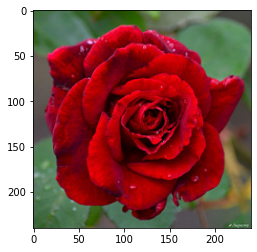

In [2]:
img = image.load_img("train/rose/20409866779_ac473f55e0_m.jpg")
plt.imshow(img)
cv2.imread("train/rose/20409866779_ac473f55e0_m.jpg").shape

(333, 500, 3)

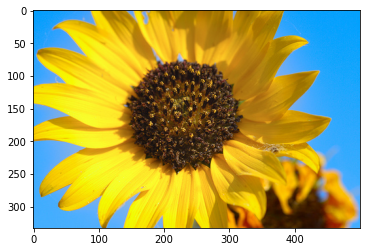

In [3]:
img1 = image.load_img('train/sunflower/164670176_9f5b9c7965.jpg')
plt.imshow(img1)
cv2.imread("train/sunflower/164670176_9f5b9c7965.jpg").shape

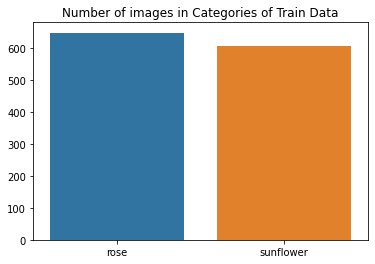

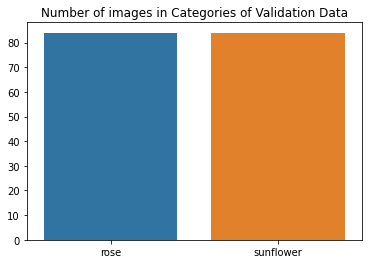

In [4]:
train_data_size = {}

for folder in  os.listdir("train") : 
    files = gb.glob(pathname= str("train" +'/' + folder + '/*.jpg'))
    train_data_size[folder] = len(files)

classes = list(train_data_size.keys())
train_no_imgs = [train_data_size[i] for i in classes]

sns.barplot(x=classes, y=train_no_imgs)
plt.title("Number of images in Categories of Train Data")
plt.show()

validation_data_size = {}

for folder in  os.listdir("validation") : 
    files = gb.glob(pathname= str("validation" +'/' + folder + '/*.jpg'))
    validation_data_size[folder] = len(files)

classes = list(validation_data_size.keys())
train_no_imgs = [validation_data_size[i] for i in classes]

sns.barplot(x=classes, y=train_no_imgs)
plt.title("Number of images in Categories of Validation Data")
plt.show()

I rescaled our all images at train and validation folders. The pixel numbers of the images were automatically divided by 255 so that the pixel numbers of the images were between 0 and 1.
So, if pixel number is 255, this pixel divided to 255 and result is 1 or pixel number is 0, this pixel divided to 255 and result is 0. Finally, normalization has been achieved.

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

flow_from_directory method is useful when the images are sorted and placed in there respective class/label folders. This method will identify classes automatically from the folder name. I defined train_dataset and validation_dataset. I gived path of file.Then I defined target size 200,200 and batch size is 12. Mean of batch size=12 is divide to 12 train folder at one epoch. My example, train folder of my dataset has 1252 images. All epochs have 105 images during training. "binary" will be 1D binary labels.

In [6]:
train_dataset= train.flow_from_directory('train/',
                                        target_size= (200,200),
                                        batch_size= 12,
                                        class_mode= 'binary')
validation_dataset= train.flow_from_directory('validation/',
                                        target_size= (200,200),
                                        batch_size= 3,
                                        class_mode= 'binary')

Found 1252 images belonging to 2 classes.
Found 168 images belonging to 2 classes.


I showed indices of classes. I have two classes. Rose and sunflower. Index of rose is 0 and index of sunflower is 1.

In [7]:
train_dataset.class_indices

{'rose': 0, 'sunflower': 1}

I printed the number of images in the classes in the train and validation folders.

In [8]:
print('total train rose images:', len(os.listdir("train/rose")))
print('total validation rose images:', len(os.listdir("validation/rose")))
print('total train sunflower images:', len(os.listdir("train/sunflower")))
print('total validation sunflower images:', len(os.listdir("validation/sunflower")))

total train rose images: 647
total validation rose images: 84
total train sunflower images: 605
total validation sunflower images: 84


# Baseline Model

I created model of convolutional neural networks(CNN). I first used the basic cnn model to see the status of the model after the training process. Conv2D layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                                                    
                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                                                    
                                   tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                                                      
                                   tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                                                                                            
                                   tf.keras.layers.Flatten(),
                                    
                                   tf.keras.layers.Dense(512,activation='relu'),
                                                                       
                                   tf.keras.layers.Dense(1,activation='sigmoid')                                    
                                   ])

I showed dimensions of the feature maps change with every successive layer with summary command.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 256)       2

Configures the model for training. Optimizer is the mechanism that the network will update itself according to the data it sees and the loss function(1e-4=0.0001). Loss function is how the network can measure how well it does a job in training data and thus steer itself in the right direction. Metrics to monitor during train and testing.

In [11]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=1e-4),
             metrics =['accuracy'])

Then model fitted. Epoch number defined 20. Defined 105 steps for each epoch and 56 steps for validation. Model saved with save command.

In [12]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch=105,
                     epochs=50,
                     validation_data= validation_dataset,
                     validation_steps=56)

model.save('flowers_baseline.h5')

Epoch 1/50
105/105 [==============================] - 54s 517ms/step - loss: 0.4708 - accuracy: 0.7556 - val_loss: 0.4293 - val_accuracy: 0.8155
Epoch 2/50
105/105 [==============================] - 54s 513ms/step - loss: 0.3012 - accuracy: 0.8746 - val_loss: 0.3675 - val_accuracy: 0.8750
Epoch 3/50
105/105 [==============================] - 54s 515ms/step - loss: 0.2495 - accuracy: 0.9050 - val_loss: 0.2411 - val_accuracy: 0.9226
Epoch 4/50
105/105 [==============================] - 55s 523ms/step - loss: 0.2309 - accuracy: 0.9065 - val_loss: 0.5155 - val_accuracy: 0.8393
Epoch 5/50
105/105 [==============================] - 54s 514ms/step - loss: 0.2059 - accuracy: 0.9225 - val_loss: 0.2193 - val_accuracy: 0.9226
Epoch 6/50
105/105 [==============================] - 54s 512ms/step - loss: 0.1878 - accuracy: 0.9337 - val_loss: 0.1920 - val_accuracy: 0.9286
Epoch 7/50
105/105 [==============================] - 54s 511ms/step - loss: 0.1616 - accuracy: 0.9433 - val_loss: 0.1780 - val_ac

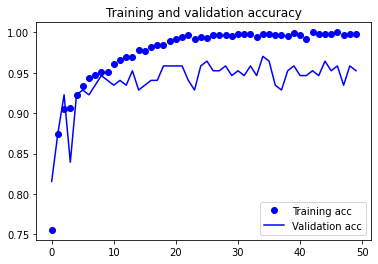

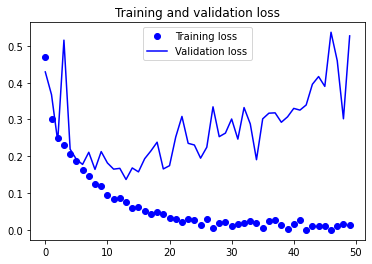

In [13]:
import matplotlib.pyplot as plt

acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

After the model was trained, accuracy and loss graphs were plotted. As you can see the plots are an example of overfitting. Training accuracy increased linearly over time, up to approximately 1. Although validation accuracy increased and decreased over time, it generally stalls at 0.94, 0.95. The validation loss reaches the minimum at the 14th epoch, while the training loss continues to decrease linearly until it approaches 0.

# Data Augmentation, Dropout and L2 Regularization

I created model of convolutional neural networks(CNN). I used data augmentation, dropout and L2 regularization to prevent overfitting. 
Our main goal in data augmentation is that the model never sees the same picture twice. This is achieved by augmenting the training data using data augmentation. 
Dropout refers to ignoring neurons during the training phase of certain set of neurons which is chosen at random.
Conv2D layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
L2 regularization tries to reduce the possibility of overfitting by keeping the values of the weights and biases small.

This can be done with a few transformations with images read by our 'ImageDataGenerator' instance.

rotation_range: 0-180 degrees. Randomly rotate pictures.
width_shift, height_shift: are ranges randomly translate pictures vertically or horizontally.
shear_range: randomly shearing transformations.
zoom_range: randomly zooming inside pictures.
horizontal_flip: randomly flipping half of images horizontally.
fill_mode:  to fill the rendered pixels after rotation or shifting(a strategy).

In [9]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

I am viewing augmented images.

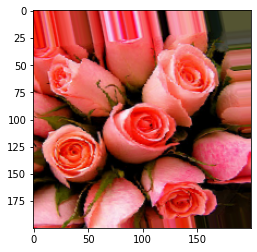

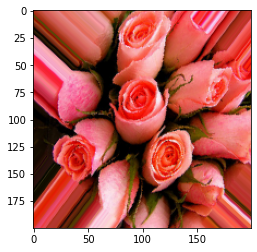

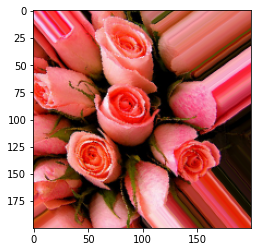

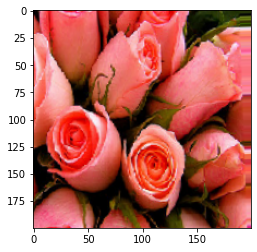

In [10]:
from keras.preprocessing import image

fnames = [os.path.join("train/rose", fname) for fname in os.listdir("train/rose")]

img_path = fnames[2]

img = image.load_img(img_path, target_size=(200, 200))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=(200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                
                                   tf.keras.layers.Conv2D(32,(3,3),kernel_regularizer=regularizers.l2(0.001),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Dropout(0.2),
                                    
                                   tf.keras.layers.Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.001),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Dropout(0.2),
                                    
                                   tf.keras.layers.Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(0.001),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Dropout(0.2),
                                   
                                   tf.keras.layers.Conv2D(256,(3,3),kernel_regularizer=regularizers.l2(0.001),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Dropout(0.2),
                                    
                                   tf.keras.layers.Conv2D(512,(3,3),kernel_regularizer=regularizers.l2(0.001),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Dropout(0.2),
                                    
                                                                                   
                                   tf.keras.layers.Flatten(),
                                    
                                   tf.keras.layers.Dense(512,kernel_regularizer=regularizers.l2(0.001),activation='relu'),
                                   
                                    
                                   tf.keras.layers.Dense(1,activation='sigmoid')                                    
                                   ])

Configures the model for training. Optimizer is the mechanism that the network will update itself according to the data it sees and the loss function. Loss function is how the network can measure how well it does a job in training data and thus steer itself in the right direction. Metrics to monitor during train and testing.

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

I trained our network using data augmentation, dropout and L2 regularization. At this point, validation data should not be augmented.

In [13]:
train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

validation = ImageDataGenerator(rescale=1./255)

train_generator = train.flow_from_directory(        
        "train",
        target_size=(200, 200),
        batch_size=12,
        class_mode='binary')

validation_generator = validation.flow_from_directory(
        "validation",
        target_size=(200, 200),
        batch_size=3,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=105,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=56)

model.save('flowers_.h5')

Found 1252 images belonging to 2 classes.
Found 168 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
105/105 [==============================] - 29s 278ms/step - loss: 1.6445 - acc: 0.6558 - val_loss: 1.4467 - val_acc: 0.7679
Epoch 2/50
105/105 [==============================] - 29s 274ms/step - loss: 1.2566 - acc: 0.8259 - val_loss: 1.3225 - val_acc: 0.7262
Epoch 3/50
105/105 [==============================] - 29s 274ms/step - loss: 1.0829 - acc: 0.8594 - val_loss: 1.0408 - val_acc: 0.8690
Epoch 4/50
105/105 [==============================] - 29s 273ms/step - loss: 0.9610 - acc: 0.8706 - val_loss: 0.9348 - val_acc: 0.8512
Epoch 5/50
105/105 [==============================] - 29s 275ms/step - loss: 0.8695 - acc: 0.8786 - val_loss: 0.8394 - val_acc: 0.9107
Epoch 6/50
105/105 [==============================] - 35s 334ms/step - loss: 0.7985 - acc: 0.8898 - val_loss: 0.7621 - val_acc: 0.8929
Epoch 7/50
105/105 [===========

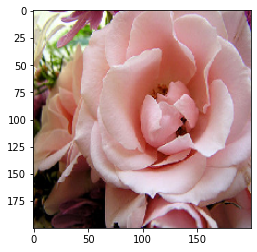

rose


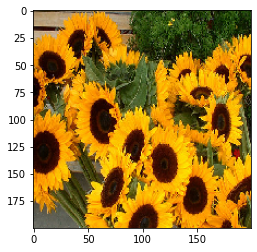

sunflower


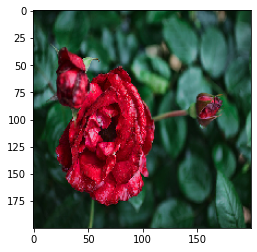

rose


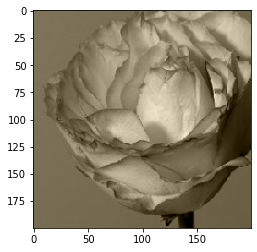

rose


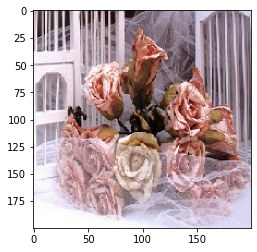

rose


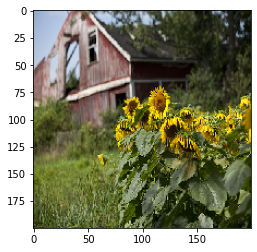

sunflower


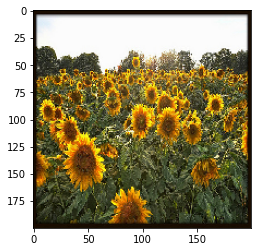

sunflower


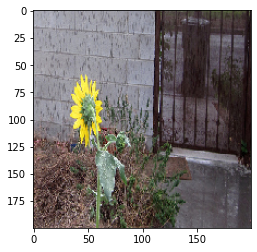

sunflower


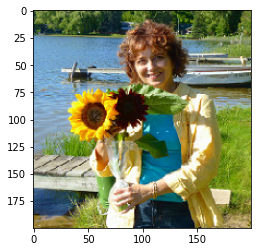

sunflower


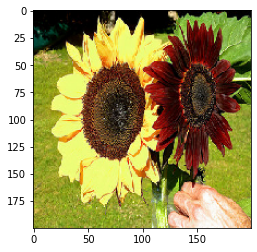

sunflower


In [16]:
dir_path = 'test'

for i in os.listdir(dir_path):
    img= image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print('rose')
    else:
        print('sunflower')

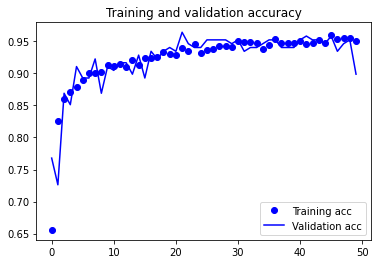

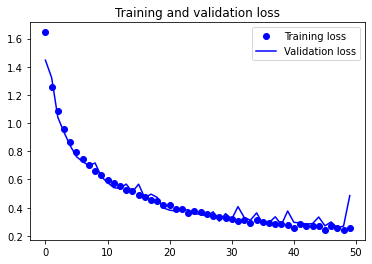

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

After the model was trained, accuracy and loss graphs were plotted. Thanks to data augmentation, dropout and weight decay(L2 regularization), I am no longer overfitting. The training curves are rather closely tracking the validation curves. Accuracy almost approached 0.95.